<a href="https://colab.research.google.com/github/Vasthisai/Projects/blob/main/Business_Case_Aerofit_Descriptive_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aerofit - Descriptive Statistics & Probability**

Problem Statement: The project aims to comprehend customer inclinations for various AeroFit treadmill models, assisting potential customers in making well-informed decisions. The study will investigate potential variations in customer attributes such as age, gender, usage frequency, and more across different treadmill types. By constructing customer profiles using graphical representations and utilizing comparative analysis tables, valuable insights will be unearthed to steer customized marketing and product strategies, ultimately enhancing overall customer contentment and engagement.

**Dataset Observations and Data Pre-processing:**

Dataset: 180 rows, 9 columns.

Data Quality: No null values in rows or columns, ensuring reliability.

Detected outliers in the data using z-scores. Consider removing these rows to enhance the accuracy of our analysis.

Added Columns: Binned Age and Income for enhanced analysis.

Calculated mean, median, std. dev., min, max for Age, Education, Usage, Income, Fitness, Miles within each product category.

**Observations from the Analysis:**

Customers bought the products in the following quantities: KP281 (80), KP481 (60), and KP781 (40).

KP281 has the highest probability of being purchased (0.444), indicating that it's the most preferred product among the customers. KP481 has a slightly lower probability of being purchased (0.333), making it the second most preferred product. KP781 has the lowest probability of being purchased (0.222), suggesting that it's the least preferred product among the customers.

The countplot indicates a nearly equal distribution of purchases between males and females for the KP281 and KP481 models.

Only 17.5% of the people who purchased the KP781 treadmill are women. This treadmill is known for its advanced features and costs $2,500.
These premium features and higher price could be appealing to a specific group of people, possibly more men. This might be because of what men generally like, what they require, or what they can afford. How the product is presented in the market and advertised can also influence who chooses to buy it. If the marketing focuses on aspects that attract men, it could explain why more men bought it than women.

Married individuals not only show a greater inclination to purchase the product across all models but also tend to utilize the product more frequently in comparison to their single counterparts.

KP781 stands out with a distinctive usage-related trend unlike KP281 and KP481. As usage increases, the purchase percentages for KP281 and KP481 decline; however, for KP781, there is a notable upward trend in purchase percentage. This indicates that customers with higher usage preferences show a stronger inclination towards purchasing KP781.

KP281 and KP481 models are preferred by individuals with moderate fitness levels (3), while KP781 is favored by experienced fitness enthusiasts (5).
Higher education levels, elevated income levels, and greater distances covered in miles are all positively associated with an augmented probability of purchasing the KP781 model. Similarly, a subtle distinction exists between the purchase tendencies of KP281 and KP481.
The age range of 18 to 36 encompasses 84% of product purchasers across all models, suggesting a strong preference for this age group.


**Customer Profiling for KP281 and KP281:**

Customers show a similar level of interest in both KP281 and KP481 due to their thin differences across various analyses and similar pricing. The thin differences in various analyses and the comparable pricing of KP281 and KP481 suggest that these two models might share similar features and functionalities, making them appealing to a similar customer segment.
KP481 slightly outperforms KP281 in terms of customer attraction based on income. This suggests that customers with relatively higher incomes might have a preference for KP481.

KP481 is also slightly more attractive to customers based on the average number of miles they expect to walk/run each week. This implies that customers with higher distance-related fitness goals might lean towards KP481.

Age, education, usage frequency, and self-rated fitness levels have similar impacts on customer attraction for both KP281 and KP481. These factors don't seem to significantly differentiate between the two models.

**Customer Profiling for KP781:**

The KP781 treadmill is special among the three models, being priced higher and having more advanced features. This makes it stand out and attracts a certain type of customer. People who have a good income, want to use the treadmill a lot, plan to run longer distances, and rate themselves as very fit are more likely to find value in the KP781.

For customers who highly prioritize advanced features, frequent usage, and intense fitness engagement, the KP781 model offers an appealing chance for an upgrade.

In [ ]:
#importing neccessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#reading the file
df = pd.read_csv('aerofit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,Income_Group,Miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,18-24,Low,101-140
1,KP281,19,Male,15,Single,2,3,31836,75,18-24,Low,61-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-24,Low,61-100
3,KP281,19,Male,12,Single,3,3,32973,85,18-24,Low,61-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-24,Low,20-60


In [ ]:
df.shape

(180, 9)

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
#Identifying Outliers

numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
z_threshold = 3
z_scores = pd.DataFrame()
for col in numerical_columns:
    z_scores[col] = (df[col] - df[col].mean()) / df[col].std()

outliers_z = df[abs(z_scores) > z_threshold].drop_duplicates()
outliers_z

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,300.0
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103336.0,NaN
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104581.0,NaN


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

<Axes: xlabel='Product', ylabel='count'>

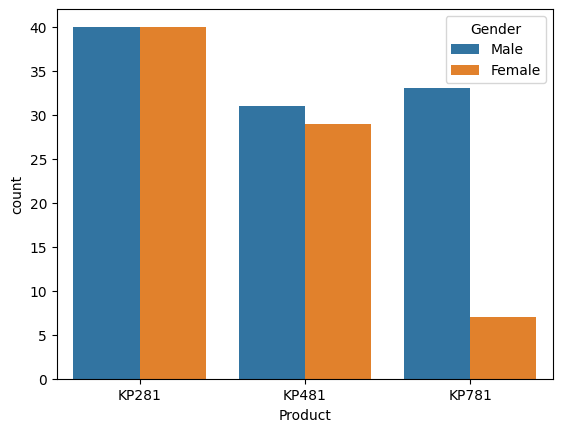

In [ ]:
sns.countplot(data = df, x = df['Product'], hue = df['Gender'])

<Axes: xlabel='Product', ylabel='Age'>

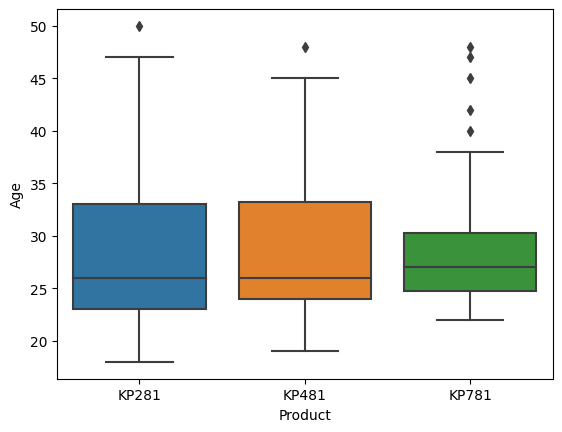

In [ ]:
sns.boxplot(data = df, x = 'Product',y = 'Age')

<Axes: xlabel='Product', ylabel='count'>

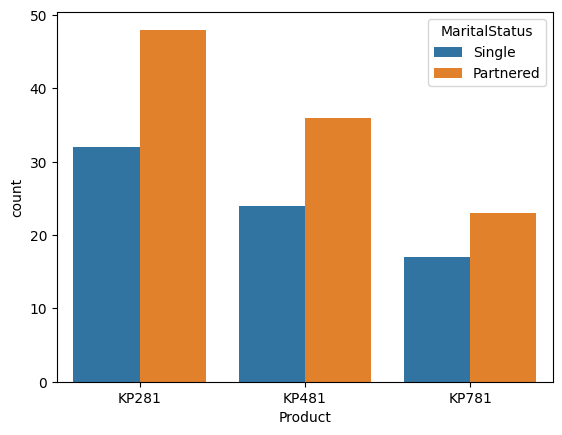

In [ ]:
sns.countplot(data = df, x = df['Product'], hue = df['MaritalStatus'])

<Axes: xlabel='Product', ylabel='count'>

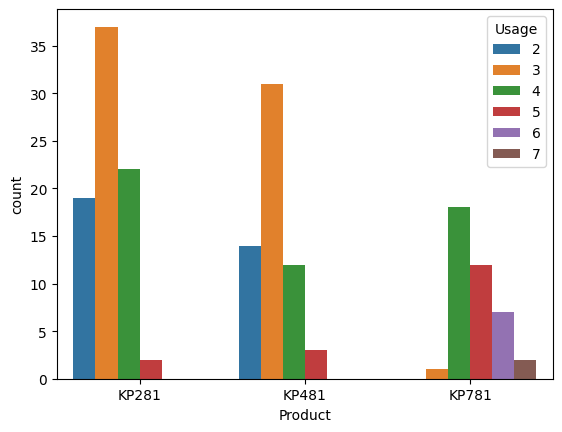

In [ ]:
sns.countplot(data = df, x = df['Product'], hue = df['Usage'])

<Axes: xlabel='Product', ylabel='count'>

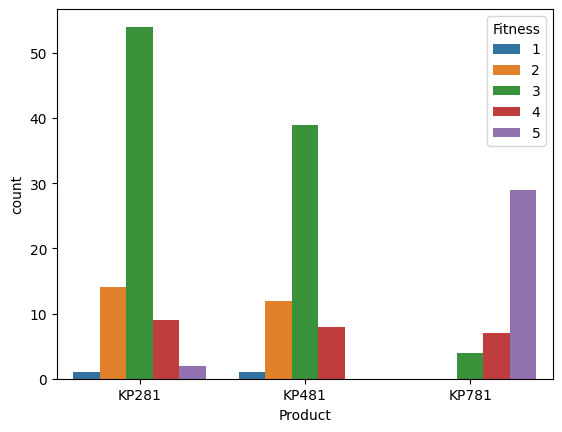

In [ ]:
sns.countplot(data = df, x = df['Product'], hue = df['Fitness'])

<Axes: xlabel='Product', ylabel='Education'>

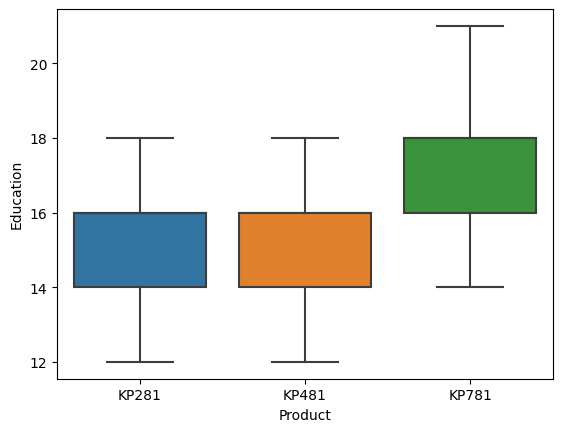

In [ ]:
sns.boxplot(data = df, x = 'Product',y = 'Education')

<Axes: xlabel='Product', ylabel='Income'>

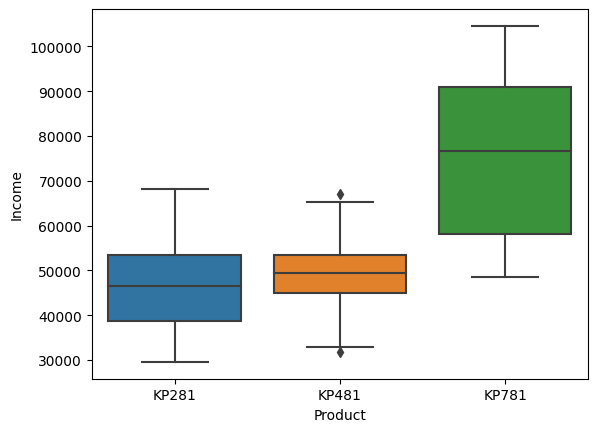

In [ ]:
sns.boxplot(data = df, x = 'Product',y = 'Income')

<Axes: xlabel='Product', ylabel='Miles'>

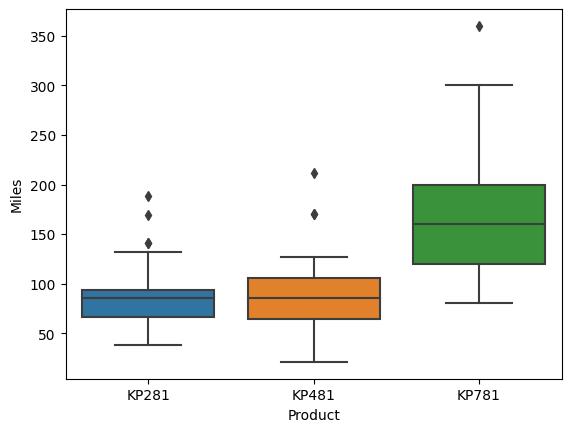

In [ ]:
sns.boxplot(data = df, x = 'Product',y = 'Miles')

<Axes: xlabel='Usage', ylabel='count'>

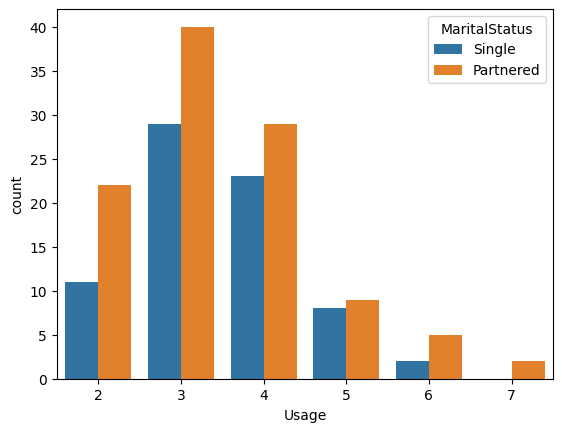

In [ ]:
sns.countplot(data = df,x = 'Usage', hue = 'MaritalStatus')

<Axes: xlabel='Income', ylabel='Count'>

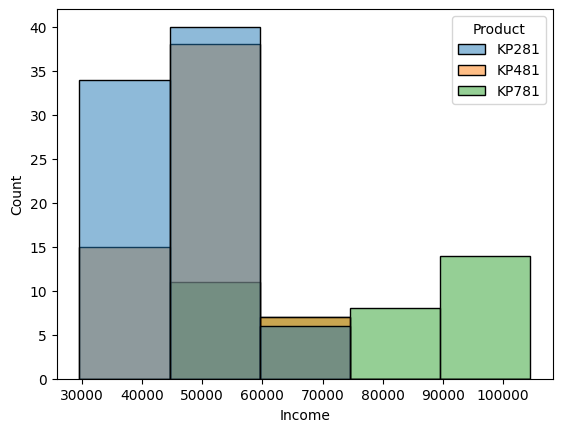

In [ ]:
sns.histplot(data = df, x = 'Income',hue = 'Product',bins = 5)

In [ ]:
#Proportion of female bought KP781 tredmill.

female_count = len(df.loc[(df['Gender'] == 'Female')])
female_count_KP781 = len(df.loc[(df['Gender'] == 'Female') & (df['Product'] == 'KP781')])

probablity_female_KP781 = female_count_KP781/female_count
probablity_female_KP781

0.09210526315789473

In [ ]:
#Proportion of male bought KP781 tredmill.

male_count = len(df.loc[(df['Gender'] == 'Male')])
male_count_KP781 = len(df.loc[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')])

probablity_male_KP781 = male_count_KP781/male_count
probablity_male_KP781

0.3173076923076923

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-146-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [ ]:
marginal_probabilities = pd.crosstab(index=df['Product'], columns='count', normalize=True)
marginal_probabilities

col_0,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [ ]:
df_KP281 = df.loc[(df['Product'] == 'KP281')]
df_KP481 = df.loc[(df['Product'] == 'KP481')]
df_KP781 = df.loc[(df['Product'] == 'KP781')]
len(df_KP281), len(df_KP481), len(df_KP781)

(80, 60, 40)

In [ ]:
df_KP281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [ ]:
df_KP481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [ ]:
df_KP781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [ ]:
# Probability of Men buying an KP281
Probablity_KP281_Male = len(df_KP281.loc[(df_KP281['Gender'] == 'Male')])/len(df.loc[(df['Gender'] == 'Male')])
round(Probablity_KP281_Male,2)

0.38

In [ ]:
# Probability of Women buying an KP281
Probablity_KP281_Female = len(df_KP281.loc[(df_KP281['Gender'] == 'Female')])/len(df.loc[(df['Gender'] == 'Female')])
round(Probablity_KP281_Female,2)

0.53

In [ ]:
# Probability of Men buying an KP481
Probablity_KP481_Male = len(df_KP481.loc[(df_KP481['Gender'] == 'Male')])/len(df.loc[(df['Gender'] == 'Male')])
round(Probablity_KP481_Male,2)

0.3

In [ ]:
# Probability of Women buying an KP481
Probablity_KP481_Female = len(df_KP481.loc[(df_KP481['Gender'] == 'Female')])/len(df.loc[(df['Gender'] == 'Female')])
round(Probablity_KP481_Female,2)

0.38

In [ ]:
gender_product = pd.crosstab(df['Gender'], df['Product'])
conditional_prob_gender = gender_product.div(gender_product.sum(axis=1), axis=0)
conditional_prob_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [ ]:
gender_product = pd.crosstab(df['Product'], df['Gender'])
conditional_prob_gender = gender_product.div(gender_product.sum(axis=1), axis=0)
conditional_prob_gender

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


In [ ]:
usage_product = pd.crosstab(df['Usage'], df['Product'])
conditional_prob_Usage = usage_product.div(usage_product.sum(axis=1), axis=0)
conditional_prob_Usage

Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000


In [ ]:
Fitness_product = pd.crosstab(df['Fitness'], df['Product'])
conditional_prob_Fitness = Fitness_product.div(Fitness_product.sum(axis=1), axis=0)
conditional_prob_Fitness

Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484


In [ ]:
usage_MaritalStatus = pd.crosstab(df['MaritalStatus'], df['Product'])
conditional_prob_MaritalStatus = usage_MaritalStatus.div(usage_MaritalStatus.sum(axis=1), axis=0)
conditional_prob_MaritalStatus

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


In [ ]:
age_bins = [18, 24, 30, 36, 42, 48, 52, float('inf')]
age_labels = ['18-24', '25-30', '31-36', '37-42', '43-48', '49-52','52+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
age_product = pd.crosstab(df['AgeGroup'], df['Product'])
conditional_prob_age = age_product.div(age_product.sum(axis=1), axis=0)
conditional_prob_age

Product,KP281,KP481,KP781
AgeGroup,,,
18-24,0.523810,0.333333,0.142857
25-30,0.436620,0.267606,0.295775
31-36,0.333333,0.487179,0.179487
37-42,0.529412,0.352941,0.117647
43-48,0.500000,0.125000,0.375000
49-52,0.333333,0.333333,0.333333


In [ ]:
marginal_prob_age = age_product.sum(axis=1) / age_product.sum().sum()
marginal_prob_age

AgeGroup
18-24    0.233333
25-30    0.394444
31-36    0.216667
37-42    0.094444
43-48    0.044444
49-52    0.016667
dtype: float64

In [ ]:
income_bins = [28000, 45000, 50000, 60000, float('inf')]
income_labels = ['Low', 'Below Average', 'Above Average', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

In [ ]:
income_product = pd.crosstab(df['Income_Group'], df['Product'])
conditional_prob_income = income_product.div(income_product.sum(axis=1), axis=0)
conditional_prob_income

Product,KP281,KP481,KP781
Income_Group,,,
Low,0.693878,0.306122,0.000000
Below Average,0.411765,0.441176,0.147059
Above Average,0.472727,0.418182,0.109091
High,0.142857,0.166667,0.690476


In [ ]:
marginal_prob_income = income_product.sum(axis=1) / income_product.sum().sum()
marginal_prob_income

Income_Group
Low              0.272222
Below Average    0.188889
Above Average    0.305556
High             0.233333
dtype: float64

In [ ]:
miles_bins = [20, 60, 100, 140, 200, 250, 380, float('inf')]
miles_labels = ['20-60', '61-100', '101-140', '141-200', '201-250', '251-380','380+']
df['Miles_group'] = pd.cut(df['Miles'], bins=miles_bins, labels=miles_labels, right=False)

In [ ]:
miles_product = pd.crosstab(df['Miles_group'], df['Product'])
conditional_prob_miles = miles_product.div(miles_product.sum(axis=1), axis=0)
conditional_prob_miles

Product,KP281,KP481,KP781
Miles_group,,,
20-60,0.600000,0.400000,0.000000
61-100,0.571429,0.415584,0.012987
101-140,0.368421,0.342105,0.289474
141-200,0.173913,0.086957,0.739130
201-250,0.000000,0.125000,0.875000
251-380,0.000000,0.000000,1.000000


In [ ]:
marginal_prob_miles = miles_product.sum(axis=1) / miles_product.sum().sum()
marginal_prob_miles

Miles_group
20-60      0.166667
61-100     0.427778
101-140    0.211111
141-200    0.127778
201-250    0.044444
251-380    0.022222
dtype: float64